In [247]:
import os

os.chdir(r'D:\subFinder')

In [248]:
import pandas as pd
import gensim
from Codes.Supervised_Trainer import run_end_to_end
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np

In [249]:
# jf_marine = pd.read_csv(r"D:\subFinder\Data\Jinfang_Preds\tmp.marine.clean", sep = "\t", header = None)

In [250]:
# jf_oral = pd.read_csv(r"D:\subFinder\Data\Jinfang_Preds\tmp.oral.clean", sep = "\t", header = None)

In [251]:
# jf_rumen = pd.read_csv(r"D:\subFinder\Data\Jinfang_Preds\tmp.rumen.clean", sep = "\t", header = None)

In [252]:
jf_uhgg = pd.read_csv(r"D:\subFinder\Data\Jinfang_Preds\tmp.uhgg.clean", sep = "\t", header = None)

In [253]:
# jf_all = pd.concat([jf_marine, jf_oral, jf_rumen, jf_uhgg], 0, ignore_index = True)

In [254]:
# jf_all = jf_all[[1,2,3,4]]

In [255]:
jf_uhgg = jf_uhgg[[1,2,3,4]]

In [256]:
jf_uhgg.columns = ["cgc_id", "sig_gene_seq", "PULid", "high_level_substr"]

In [257]:
jf_uhgg.head()

,cgc_id,sig_gene_seq,PULid,high_level_substr
0,MGYG000000001_14|CGC1,"CBM34|GH77|GH13|GH13_39,GT35,GT5,null,null,GH1...",X,alpha-glucan
1,MGYG000000002_3|CGC1,"9.A.11.1.1,9.A.11.1.1,null,9.A.11.1.1,Aminotra...",X,starch
2,MGYG000000003_2|CGC3,"1.B.14.6.1,GH130,2.A.21.3.19,HTH_AraC+HTH_AraC...",X,beta-mannan
3,MGYG000000003_2|CGC11,"PL12|PL12_2,PL12|PL12_2,PL13,null,1.B.14.6.1,n...",X,host glycan
4,MGYG000000007_1|CGC1,"GH13_31|GH13,GH13|CBM34|GH13_20,3.A.1.1.20,3.A...",X,starch


In [258]:
jf_uhgg = jf_uhgg.drop_duplicates("cgc_id")

In [259]:
jf_uhgg.shape

(27195, 4)

In [260]:
jf_uhgg["cgc_id"].nunique()

27195

In [261]:
jf_uhgg.columns = ["cgc_id", "sig_gene_seq", "PULid", "JF_high_level_substr"]

In [262]:
## read subfinder output
subfinder_uhgg = pd.read_csv(r"Data/Output/Predictions/Predictions_UHGG_with_probability_and_p_values_Blast_Style_new_sup_new_unsup.csv")

In [263]:
subfinder_uhgg.shape

(412027, 4)

In [264]:
subfinder_uhgg["sequence"].nunique()

58861

In [265]:
subfinder_uhgg.head()

,sequence,substrate,probability_score,p_value
0,"1.A.1,2.A.9,null,9.B.168,1.A.62,GT51,9.B.186",alginate,0.200667,0.999969
1,"1.A.1,2.A.9,null,9.B.168,1.A.62,GT51,9.B.186",beta-glucan,0.352000,0.999969
2,"1.A.1,2.A.9,null,9.B.168,1.A.62,GT51,9.B.186",cellulose,0.297333,0.999969
3,"1.A.1,2.A.9,null,9.B.168,1.A.62,GT51,9.B.186",host glycan,0.417333,0.999969
4,"1.A.1,2.A.9,null,9.B.168,1.A.62,GT51,9.B.186",pectin,0.369333,0.999969


In [266]:
subfinder_uhgg.columns = ["sequence", "subFinder_high_level_substr", "probability_score", "p_value"]

In [267]:
len(subfinder_uhgg.groupby('sequence')['probability_score'].idxmax().values)

58861

In [268]:
subfinder_uhgg_preds = subfinder_uhgg.iloc[subfinder_uhgg.groupby('sequence')['probability_score'].idxmax().values,:]

In [269]:
subfinder_uhgg_preds = subfinder_uhgg_preds.reset_index(drop = True)

In [270]:
subfinder_uhgg_preds.head()

,sequence,subFinder_high_level_substr,probability_score,p_value
0,"1.A.1,2.A.9,null,9.B.168,1.A.62,GT51,9.B.186",host glycan,0.417333,0.999969
1,"1.A.1,2.A.9,null,null,9.B.168,1.A.62,GT51,9.B.186",host glycan,0.425333,0.999969
2,"1.A.1,9.B.10,null,null,AA10",beta-glucan,0.480667,0.849121
3,"1.A.1,9.B.143,GH13_20",starch,0.439333,0.996307
4,"1.A.1,9.B.23,null,9.A.40,GH12",starch,0.309333,0.999969


In [271]:
to_keep = subfinder_uhgg_preds["subFinder_high_level_substr"].unique()

In [272]:
uhgg_data = pd.read_csv(r"Data/Output/Unsupervised_10_12/output_UHGG.csv")

In [273]:
uhgg_data = uhgg_data.drop_duplicates("sequence")

In [274]:
subfinder_uhgg_preds = subfinder_uhgg_preds.merge(uhgg_data, how = "left", on = "sequence")

In [275]:
subfinder_uhgg_preds.shape

(58861, 5)

In [276]:
subfinder_uhgg_preds.head()

,sequence,subFinder_high_level_substr,probability_score,p_value,cgc_id
0,"1.A.1,2.A.9,null,9.B.168,1.A.62,GT51,9.B.186",host glycan,0.417333,0.999969,MGYG000001364_9|CGC5
1,"1.A.1,2.A.9,null,null,9.B.168,1.A.62,GT51,9.B.186",host glycan,0.425333,0.999969,MGYG000003693_29|CGC2
2,"1.A.1,9.B.10,null,null,AA10",beta-glucan,0.480667,0.849121,MGYG000001436_2|CGC28
3,"1.A.1,9.B.143,GH13_20",starch,0.439333,0.996307,MGYG000000173_1|CGC1
4,"1.A.1,9.B.23,null,9.A.40,GH12",starch,0.309333,0.999969,MGYG000000227_6|CGC6


In [277]:
jf_uhgg_to_kepp = jf_uhgg[jf_uhgg["JF_high_level_substr"].isin(to_keep)]

In [278]:
overlapped = subfinder_uhgg_preds.merge(jf_uhgg_to_kepp[["cgc_id", "JF_high_level_substr"]], how = "inner", on = ["cgc_id"])

In [279]:
overlapped.head()

,sequence,subFinder_high_level_substr,probability_score,p_value,cgc_id,JF_high_level_substr
0,"1.A.1,GH13_31,HTH_AraC,8.A.59,SBP_bac_1,3.A.1,...",starch,0.697333,0.000000,MGYG000000735_30|CGC1,starch
1,"1.A.11,3.A.1,3.A.1,3.A.1,GH77,LacI,9.B.28",starch,0.593333,0.000000,MGYG000000204_6|CGC5,starch
2,"1.A.11,CbiA,null,3.A.1,3.A.1,3.A.1,GH105",beta-glucan,0.460000,0.982422,MGYG000003005_11|CGC1,pectin
3,"1.A.11,null,3.A.1,3.A.1,3.A.1,GH13_36",starch,0.660000,0.000000,MGYG000002263_13|CGC1,starch
4,"1.A.13,1.B.14,null,GH97,null,Sigma70_r2|Sigma7...",host glycan,0.594000,0.000000,MGYG000000265_5|CGC1,xylan


In [280]:
overlapped.shape

(7694, 6)

In [281]:
match = overlapped[overlapped["subFinder_high_level_substr"] == overlapped["JF_high_level_substr"]]

In [282]:
match = match[["cgc_id", "sequence", "subFinder_high_level_substr", "JF_high_level_substr", "probability_score", "p_value"]]

In [283]:
match.to_csv(r"Data\Output\Predictions\UHGG_match_with_JF.csv", index = False)

In [284]:
match.shape

(5297, 6)

In [294]:
match["subFinder_high_level_substr"].value_counts()

starch         1846
pectin         1042
host glycan     948
beta-glucan     737
xylan           638
cellulose        62
alginate         24
Name: subFinder_high_level_substr, dtype: int64

In [285]:
np.mean(overlapped["subFinder_high_level_substr"] == overlapped["JF_high_level_substr"])

0.6884585391213933

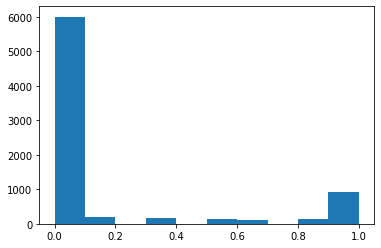

In [286]:
plt.hist(overlapped["p_value"])
plt.show()

In [287]:
thresholded = subfinder_uhgg_preds[subfinder_uhgg_preds["p_value"] <= 0.1]

In [288]:
thresholded_overlapped = thresholded.merge(jf_uhgg_to_kepp[["cgc_id", "JF_high_level_substr"]], how = "inner", on = ["cgc_id"])

In [289]:
thresholded_overlapped.shape

(6007, 6)

In [290]:
thresholded_overlapped

,sequence,subFinder_high_level_substr,probability_score,p_value,cgc_id,JF_high_level_substr
0,"1.A.1,GH13_31,HTH_AraC,8.A.59,SBP_bac_1,3.A.1,...",starch,0.697333,0.000000,MGYG000000735_30|CGC1,starch
1,"1.A.11,3.A.1,3.A.1,3.A.1,GH77,LacI,9.B.28",starch,0.593333,0.000000,MGYG000000204_6|CGC5,starch
2,"1.A.11,null,3.A.1,3.A.1,3.A.1,GH13_36",starch,0.660000,0.000000,MGYG000002263_13|CGC1,starch
3,"1.A.13,1.B.14,null,GH97,null,Sigma70_r2|Sigma7...",host glycan,0.594000,0.000000,MGYG000000265_5|CGC1,xylan
4,"1.A.13,HTH_AraC|HTH_AraC,null,3.A.1,3.A.1,3.A....",pectin,0.716667,0.000000,MGYG000003381_58|CGC1,pectin
...,...,...,...,...,...,...
6002,"PL8_3,GH105|PL33_2,GH89,GH95,GH88,GH154,null,n...",pectin,0.624000,0.000000,MGYG000000273_17|CGC2,host glycan
6003,"PL8_3|CBM67|GH78,GH28,GH88,GH2,PL8_3,8.A.46,1....",pectin,0.574667,0.000488,MGYG000004899_32|CGC1,pectin
6004,"PL8|CBM32|CBM32,4.A.6,4.A.6,4.A.6",host glycan,0.737333,0.000000,MGYG000000192_10|CGC2,host glycan
6005,"PL9_1,GH133,null,3.A.1,3.A.1,HTH_AraC|HTH_AraC...",xylan,0.584667,0.000488,MGYG000003512_69|CGC1,pectin


In [291]:
np.mean(thresholded_overlapped["subFinder_high_level_substr"] == thresholded_overlapped["JF_high_level_substr"])

0.7284834359913435

In [292]:
thresholded_overlapped.shape

(6007, 6)